### Intramarket differencing
Research
ref: https://github.com/neurotrader888/IntramarketDifference/blob/main/intermarket.py

In [16]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import os
import scipy
import mplfinance as mpf

In [17]:
def cmma(ohlc: pd.DataFrame, lookback: int, atr_lookback: int = 168):
    # cmma = Close minus moving average
    atr = ta.atr(ohlc['high'], ohlc['low'], ohlc['close'], atr_lookback)
    ma = ohlc['close'].rolling(lookback).mean()
    ind = (ohlc['close'] - ma) / (atr * lookback ** 0.5)
    return ind

In [18]:
def import_csv_files(file_path: str):
    df = pd.read_csv(file_path)
    return df


In [19]:
btc_data = import_csv_files("BTCUSDT3600.csv")
btc_data['date'] = btc_data['date'].astype('datetime64[s]')
btc_data = btc_data.set_index('date')
btc_data = btc_data.dropna()


eth_data = import_csv_files("ETHUSDT3600.csv")
eth_data['date'] = eth_data['date'].astype('datetime64[s]')
eth_data = eth_data.set_index('date')
eth_data = eth_data.dropna()


In [20]:
# Get log diff of eth and btc
eth_data['diff'] = np.log(eth_data['close']).diff()
btc_data['diff'] = np.log(btc_data['close']).diff()

eth_data['next_return'] = eth_data['diff'].shift(-1)
btc_data['next_return'] = btc_data['diff'].shift(-1)


In [21]:
lookback = 24
threshold = 0.25
atr_lookback = 168
btc_cmma = cmma(btc_data, lookback, atr_lookback)
eth_cmma = cmma(eth_data, lookback, atr_lookback)

intermarket_diff = eth_cmma - btc_cmma


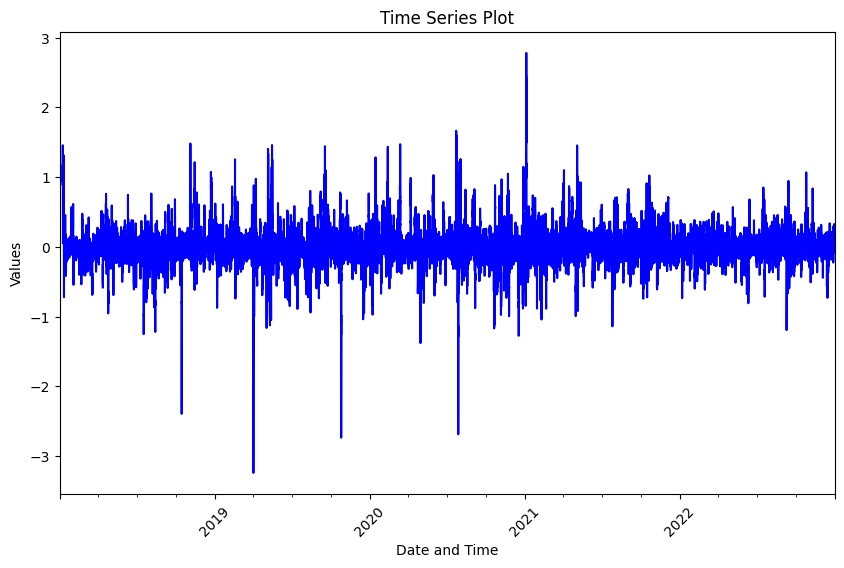

In [25]:


time_series = intermarket_diff
time_series.index = pd.to_datetime(time_series.index)

# Plotting the time series
fig, ax = plt.subplots(figsize=(10, 6))
time_series.plot(ax=ax, color='b')

plt.title('Time Series Plot')
plt.xlabel('Date and Time')
plt.ylabel('Values')

plt.xticks(rotation=45)
plt.show()